# Judul : Challenge Test Data Scientist

## 1. Perkenalan

Nama : `Fachmi Maris`


### Requirement:

1. Buatlah sample data untuk bahan analisis

2. Buatkan Analisis Data tersebut berdasarkan variable berikut ini: Nama Lokasi, Jam Login, Nama, Email, No Telp, Tahun Lahir, Merek HP, Digital Interest, Location Type

3. Kembangkan variable diatas menjadi beberapa variable baru (Nilai Plus)

4. Membuat System Confidence Interval (Nilai Plus)


## 2. Import Library

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config
import random

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#For Statistic
import statsmodels.stats.api as sms


np.random.seed(42)
random.seed(42)

## 3. Data Loading

Pada tahap ini akan membuat dataset sebagai sample data untuk bahan analisis. Peneliti akan membuat dataset dengan 100 baris dan 9 kolom sesuai `requirement`

### Nama Lokasi

Pada kolom nama lokasi peneliti akan memberikan isi kolom dengan nama kota di daerah Jaboedetabek. Peneliti membuat dataframe dengan mengenerate secara random sebanyak 100 baris data.

In [4]:
np.random.seed(42)
nama_lokasi = ["Jakarta", "Bogor", "Depok", "Tangerang", "Bekasi"]
data_nama_lokasi = pd.DataFrame({
    "nama_lokasi": np.random.choice(nama_lokasi, size=100)
})

In [5]:
data_nama_lokasi

,nama_lokasi
0,Tangerang
1,Bekasi
2,Depok
3,Bekasi
4,Bekasi
...,...
95,Depok
96,Bekasi
97,Bogor
98,Bogor


In [6]:
data_nama_lokasi.value_counts()

nama_lokasi
Tangerang      26
Bogor          21
Bekasi         19
Jakarta        18
Depok          16
dtype: int64

Berdasarkan perhitungan jumlah setiap jenis isi data diketahui bahwa pada generate data random ini kota dengan jumlah data terbanyak adalah `Tangerang` dengan jumlah 26 data dan data terendah jumlahnya adalah kota `Depok` berjumlah 16 data.

### Jam Login

Peneliti akan membuat generate data jam login secara random sebanyak 100 baris data. Data ini dibuat pada tanggal 21 Februari 2003. Jadi bisa dinyatakan penelitian dilakukan untuk tanggal tersebut untuk mengetahui waktu user login .

In [7]:
np.random.seed(42)
jam_login = np.random.randint(0, 24, size=100)
menit_login = np.random.randint(0, 60, size=100)
detik_login = np.random.randint(0, 60, size=100)

# Combine the random data into a datetime object
waktu_login = pd.to_datetime({
    'year': 2023,
    'month': 2,
    'day': 21,
    'hour': jam_login,
    'minute': menit_login,
    'second': detik_login
})

# Create a dataframe with the "jam login" column
data_jam_login = pd.DataFrame({'jam login': waktu_login})



In [8]:
data_jam_login

,jam login
0,2023-02-21 06:07:12
1,2023-02-21 19:23:40
2,2023-02-21 14:10:02
3,2023-02-21 10:50:38
4,2023-02-21 07:16:05
...,...
95,2023-02-21 06:00:17
96,2023-02-21 08:56:39
97,2023-02-21 23:26:00
98,2023-02-21 00:56:10


### Nama

Pada penelitian ini akan membuat kolom `nama` yang diperoloeh dari :
https://catalog.data.gov/dataset/popular-baby-name. Hal ini dilakukan untuk mempersingkat waktu penelitian karena nama-nama ini terdiri dari 100 nama berbeda. 

In [9]:
nama = {'nama': ['GERALDINE',
'GIA',
'GIANNA',
'GISELLE',
'GRACE',
'GUADALUPE',
'HAILEY',
'HALEY',
'HANNAH',
'HAYLEE',
'HAYLEY',
'HAZEL',
'HEAVEN',
'HEIDI',
'HEIDY',
'HELEN',
'IMANI',
'INGRID',
'IRENE',
'IRIS',
'ISABEL',
'ISABELA',
'ISABELLA',
'ISABELLE',
'ISIS',
'ITZEL',
'IZABELLA',
'JACQUELINE',
'JADA',
'JADE',
'JAELYNN',
'JAMIE',
'JANELLE',
'JASLENE',
'JASMIN',
'JASMINE',
'JAYDA',
'JAYLA',
'JAYLAH',
'JAYLEEN',
'JAYLENE',
'JAYLIN',
'JAYLYN',
'JAZLYN',
'JAZMIN',
'JAZMINE',
'JENNIFER',
'JESSICA',
'JIMENA',
'JOCELYN',
'JOHANNA',
'JOSELYN',
'JULIA',
'JULIANA',
'JULIANNA',
'JULIET',
'JULIETTE',
'JULISSA',
'KAELYN',
'KAILEY',
'KAILYN',
'KAITLYN',
'KAMILA',
'KAREN',
'KARLA',
'KATE',
'KATELYN',
'KATELYNN','KATHERINE',
'KATIE',
'KAYLA',
'KAYLEE',
'KAYLEEN',
'KAYLEIGH',
'KAYLIE',
'KAYLIN',
'KEILY',
'KELLY',
'KEYLA',
'KHLOE',
'KIARA',
'KIMBERLY',
'KRYSTAL',
'KYLEE',
'KYLIE',
'LAILA',
'LAURA',
'LAUREN',
'LAYLA',
'LEA',
'LEAH',
'LEILA',
'LEILANI',
'LESLEY',
'LESLIE',
'LESLY',
'LEYLA',
'LIA',
'LIANA',
'LILIANA']}

data_nama = pd.DataFrame(nama)

data_nama.head()

,nama
0,GERALDINE
1,GIA
2,GIANNA
3,GISELLE
4,GRACE


In [10]:
data_nama.shape

(100, 1)

### email

Pada kolom email, alamat email dibuat sederhana dengan cara menambahkan kata `@gmail.com` di setiap nama-nama di kolom `nama`. Email ini yang digunakan untuk user melakukan login.

In [11]:
data_nama['Email'] = data_nama['nama'] + '@gmail.com'

In [12]:
data_nama

,nama,Email
0,GERALDINE,GERALDINE@gmail.com
1,GIA,GIA@gmail.com
2,GIANNA,GIANNA@gmail.com
3,GISELLE,GISELLE@gmail.com
4,GRACE,GRACE@gmail.com
...,...,...
95,LESLY,LESLY@gmail.com
96,LEYLA,LEYLA@gmail.com
97,LIA,LIA@gmail.com
98,LIANA,LIANA@gmail.com


### Nomor telpon

Pada kolom nomor telpon, peneliti akan membuat data sebanyak 100 baris data secara random dimana nomor telepon tersbeut berdasarkan provider yang ada di Indonesia seperti Telkomsel, XL, Tri, Indosat, dan Axis

In [13]:
np.random.seed(42)
providers = ['0812', '0813', '0821', '0822', '0831', '0832', '0851', '0852', '0853', '0811', '0814', '0815', '0816', '0855', '0856', '0857', '0858', '0817', '0818', '0819', '0859', '0877', '0878', '0895', '0896', '0897', '0898', '0899']

nomor_handpone = []
for i in range(100):
    provider = random.choice(providers)
    nomor = provider + str(random.randint(1000000,9999999))
    nomor_handpone.append(nomor)

data_nomor_HP=pd.DataFrame({'Nomor HP' : nomor_handpone})
data_nomor_HP


,Nomor HP
0,08592867825
1,08125614226
2,08524744854
3,08312719583
4,08772458591
...,...
95,08982161193
96,08969937326
97,08963109911
98,08318973915


In [14]:
data_nomor_HP[data_nomor_HP.duplicated()].shape

(0, 1)

Tidak ditemukan nomor hp yang terduplikat dalam pembuatan kolom nomor hp.

### Tahun Lahir


Pada kolom tahun lahir akan dibuat secara random dari rentang dari 1965 sampai 2016. Peniliti beranggapan kelahiran tahun 2016 akan masuk usia SD di tahun 2023 sehingga sudah wajar pada zaman sekarang usia 7 tahunan sudah mampu menggunakan smartphone minimal untuk keperluan sekolah. Kelahiran tertua kelahiran tahun 1968 karena pada kelahiran tahun tersebut berpotensi masih bekerja dan belum pensiun

In [15]:
random.seed(42) # menentukan seed
tahun_lahir = [random.randint(1968, 2016) for i in range(100)] # menghasilkan bilangan acak
data_tahun_lahir = pd.DataFrame({
    "Tahun Lahir":tahun_lahir
})
data_tahun_lahir

,Tahun Lahir
0,2008
1,1975
2,1969
3,2015
4,1985
...,...
95,2002
96,2014
97,1983
98,1978


### Merek HP

Pada kolom ini, peneliti membuat data merk hp dengan merk hp yang paling sering digunakan orang Indonesia yaitu `iPhone`, `Samsung`, `Vivo`, `Xiaomi`, `Asus`. Kolom merk hp dibuat secara random pengisiannya sebanyak 100 data

In [16]:
np.random.seed(42)
merk_hp = ["iPhone", "Samsung", "Vivo", "Xiaomi", "ASUS"]
data_merk_hp = pd.DataFrame({
    "Merk HP": np.random.choice(merk_hp, size=100)
})
data_merk_hp

,Merk HP
0,Xiaomi
1,ASUS
2,Vivo
3,ASUS
4,ASUS
...,...
95,Vivo
96,ASUS
97,Samsung
98,Samsung


In [17]:
data_merk_hp.value_counts()

Merk HP
Xiaomi     26
Samsung    21
ASUS       19
iPhone     18
Vivo       16
dtype: int64

Dari pembuatan data untuk kolom merk hp secara random diketahui bahwa merk dengan jumlah data terbanyak adalah merk `Xiaomi` dan merk hp dengan jumlah terendah adalah merk`Vivo` 

### Digital Interest

Digital interest atau minat digital adalah minat seseorang terhadap teknologi digital dan produk-produk teknologi digital. Banyak contoh `digital interest` namun pada penelitian ini peneliti hanya mengambil contoh dalam pembuatan data seperti`'E-commerce`, `Artificial Intelligence`, `game online`, `mobile app`, dan `social media. Kolom akan memiliki 100 baris data secara acak.

In [18]:
np.random.seed(42)
digital_interest = ["E-commerce", "Artificial Intelligence", "game online", "mobile app", "social media"]
data_digital_interest = pd.DataFrame({
    "digital interest": np.random.choice(digital_interest, size=100)
})
data_digital_interest

,digital interest
0,mobile app
1,social media
2,game online
3,social media
4,social media
...,...
95,game online
96,social media
97,Artificial Intelligence
98,Artificial Intelligence


In [19]:
data_digital_interest.value_counts()

digital interest       
mobile app                 26
Artificial Intelligence    21
social media               19
E-commerce                 18
game online                16
dtype: int64

Berdasarkan informasi di atas, diketahui bahwa data `mobile app` memiliki jumlah data terbanyak pada kolom digital interest dan data `game online` memiliki data terendah jumlahnya.

### Location Type

Pada kolom ini akan berisi informasi mengenai jenis tempat user melakukan login. Kolom `Location Type` akan memiliki data seperti `toko`, `tempat tinggal`, `mall`, `cafe`, `kantor`, dan `restaurant`.Pembuatan kolom ini akan terdiri dari 100 data dimana penginputan data dilakukan secara random.

In [20]:
np.random.seed(42)
Location_type = ["toko", "tempat tinggal", "mall", "cafe","kantor", 'restaurant']
data_Location_type = pd.DataFrame({
    "Location type": np.random.choice(Location_type, size=100)
})
data_Location_type

,Location type
0,cafe
1,kantor
2,mall
3,kantor
4,kantor
...,...
95,cafe
96,cafe
97,kantor
98,toko


In [21]:
data_Location_type.value_counts()

Location type 
cafe              25
tempat tinggal    19
kantor            17
restaurant        17
mall              11
toko              11
dtype: int64

Beerdasarkan informasi di atas, diketahui bahwa data terbanyak yang dibuat secara random di kolom `location_type` adalah `cafe` yang berjumlah 25 data dan data terendah yang dibuat secara random di kolom `location_type` berjumlah 11 data yaitu di `mall` dan `toko`. 

### Menggabungkan Seluruh Kolom 

Pada tahap ini adalah menggabungkan seluruh kolom yang telah dibuat menjadi satu dataframe sesuai dengan requeiremnt di poin nomor 2

In [22]:
data = pd.concat([data_nama_lokasi,data_jam_login,data_nama,data_nomor_HP,data_tahun_lahir,data_merk_hp,data_digital_interest,data_Location_type], ignore_index=True, axis=1)
data.columns=['Nama Lokasi', 'Jam Login', 'Nama', 'Email', 'No Telp', 'Tahun Lahir', 'Merek HP', 'Digital Interest', 'Location Type']
data

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merek HP,Digital Interest,Location Type
0,Tangerang,2023-02-21 06:07:12,GERALDINE,GERALDINE@gmail.com,08592867825,2008,Xiaomi,mobile app,cafe
1,Bekasi,2023-02-21 19:23:40,GIA,GIA@gmail.com,08125614226,1975,ASUS,social media,kantor
2,Depok,2023-02-21 14:10:02,GIANNA,GIANNA@gmail.com,08524744854,1969,Vivo,game online,mall
3,Bekasi,2023-02-21 10:50:38,GISELLE,GISELLE@gmail.com,08312719583,2015,ASUS,social media,kantor
4,Bekasi,2023-02-21 07:16:05,GRACE,GRACE@gmail.com,08772458591,1985,ASUS,social media,kantor
...,...,...,...,...,...,...,...,...,...
95,Depok,2023-02-21 06:00:17,LESLY,LESLY@gmail.com,08982161193,2002,Vivo,game online,cafe
96,Bekasi,2023-02-21 08:56:39,LEYLA,LEYLA@gmail.com,08969937326,2014,ASUS,social media,cafe
97,Bogor,2023-02-21 23:26:00,LIA,LIA@gmail.com,08963109911,1983,Samsung,Artificial Intelligence,kantor
98,Bogor,2023-02-21 00:56:10,LIANA,LIANA@gmail.com,08318973915,1978,Samsung,Artificial Intelligence,toko


## Variabel Baru

### Umur

variabel baru ini merupakan selisih tahun sekarang yaitu tahun 2023 dengan tahun lahir 
umur = 2023 - tahun lahir. Hasil selisih tersebut adalah umur user yang sedang login

In [23]:
data["Umur"]= 2023 - data["Tahun Lahir"]

In [24]:
data

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merek HP,Digital Interest,Location Type,Umur
0,Tangerang,2023-02-21 06:07:12,GERALDINE,GERALDINE@gmail.com,08592867825,2008,Xiaomi,mobile app,cafe,15
1,Bekasi,2023-02-21 19:23:40,GIA,GIA@gmail.com,08125614226,1975,ASUS,social media,kantor,48
2,Depok,2023-02-21 14:10:02,GIANNA,GIANNA@gmail.com,08524744854,1969,Vivo,game online,mall,54
3,Bekasi,2023-02-21 10:50:38,GISELLE,GISELLE@gmail.com,08312719583,2015,ASUS,social media,kantor,8
4,Bekasi,2023-02-21 07:16:05,GRACE,GRACE@gmail.com,08772458591,1985,ASUS,social media,kantor,38
...,...,...,...,...,...,...,...,...,...,...
95,Depok,2023-02-21 06:00:17,LESLY,LESLY@gmail.com,08982161193,2002,Vivo,game online,cafe,21
96,Bekasi,2023-02-21 08:56:39,LEYLA,LEYLA@gmail.com,08969937326,2014,ASUS,social media,cafe,9
97,Bogor,2023-02-21 23:26:00,LIA,LIA@gmail.com,08963109911,1983,Samsung,Artificial Intelligence,kantor,40
98,Bogor,2023-02-21 00:56:10,LIANA,LIANA@gmail.com,08318973915,1978,Samsung,Artificial Intelligence,toko,45


In [25]:
data["Umur"].value_counts().reset_index().sort_values(by='index', ascending=False)

,index,Umur
39,55,1
16,54,3
11,53,3
17,51,2
0,50,5
5,49,4
27,48,2
33,47,1
38,46,1
3,45,4


Berdasarkan informasi di atas, diketahui bahwa umur termuda yang melakukan login di dataset ini adalah umur 7 tahun dan umur tertua adalah umur 55 tahun.

### Pengelompokkan waktu login

Pengelompokkan ini bertujuan untuk memberi label pada waktu saat user login seperti menunjukan waktu dini hari, pagi , siang, sore, dan malam hari. 

In [26]:
bins = [0, 5, 9, 14, 18, 24]
labels = ['dini hari', 'Pagi', 'Siang', 'Sore', 'Malam']
data['Waktu Login'] = pd.cut(pd.to_datetime(data['Jam Login'], format='%H:%M:%S').dt.hour, bins=bins, labels=labels, include_lowest=True)

In [27]:
data

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merek HP,Digital Interest,Location Type,Umur,Waktu Login
0,Tangerang,2023-02-21 06:07:12,GERALDINE,GERALDINE@gmail.com,08592867825,2008,Xiaomi,mobile app,cafe,15,Pagi
1,Bekasi,2023-02-21 19:23:40,GIA,GIA@gmail.com,08125614226,1975,ASUS,social media,kantor,48,Malam
2,Depok,2023-02-21 14:10:02,GIANNA,GIANNA@gmail.com,08524744854,1969,Vivo,game online,mall,54,Siang
3,Bekasi,2023-02-21 10:50:38,GISELLE,GISELLE@gmail.com,08312719583,2015,ASUS,social media,kantor,8,Siang
4,Bekasi,2023-02-21 07:16:05,GRACE,GRACE@gmail.com,08772458591,1985,ASUS,social media,kantor,38,Pagi
...,...,...,...,...,...,...,...,...,...,...,...
95,Depok,2023-02-21 06:00:17,LESLY,LESLY@gmail.com,08982161193,2002,Vivo,game online,cafe,21,Pagi
96,Bekasi,2023-02-21 08:56:39,LEYLA,LEYLA@gmail.com,08969937326,2014,ASUS,social media,cafe,9,Pagi
97,Bogor,2023-02-21 23:26:00,LIA,LIA@gmail.com,08963109911,1983,Samsung,Artificial Intelligence,kantor,40,Malam
98,Bogor,2023-02-21 00:56:10,LIANA,LIANA@gmail.com,08318973915,1978,Samsung,Artificial Intelligence,toko,45,dini hari


### Pengelompokan Provider berdasarkan No Telp

Pada variabel baru ini berisi informasi mengenai provider yang digunakan olah user berdasarkan nomor telp yang digunakan oleh user. Provider di dataset ini adalah provider terkenal di Indonesia seperti  `Telkomsel`, `Indoset`, `XL Axiata`, `Tri (3)` ,dan `Axis`.

In [28]:
telkomsel = ['0811', '0812', '0813', '0821', '0822', '0852', '0853', '0851', '0814', '0815', '0816', '0855', '0856', '0857', '0858', '0817', '0818', '0819', '0877', '0878']
indosat = ['0814', '0815', '0816', '0855', '0856', '0857', '0858']
xl = ['0817', '0818', '0819', '0859']
tri = ['0895', '0896', '0897', '0898', '0899']
axis= ['0831', '0832']

# membuat kolom provider dengan np.select
conditions = [
    data['No Telp'].str[:4].isin(telkomsel),
    data['No Telp'].str[:4].isin(indosat),
    data['No Telp'].str[:4].isin(xl),
    data['No Telp'].str[:4].isin(tri),
    data['No Telp'].str[:4].isin(axis)
]
choices = ['Telkomsel', 'Indosat Ooredoo', 'XL Axiata', 'Tri (3)', 'Axis']
data['provider'] = np.select(conditions, choices, default='Tidak diketahui')
data

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merek HP,Digital Interest,Location Type,Umur,Waktu Login,provider
0,Tangerang,2023-02-21 06:07:12,GERALDINE,GERALDINE@gmail.com,08592867825,2008,Xiaomi,mobile app,cafe,15,Pagi,XL Axiata
1,Bekasi,2023-02-21 19:23:40,GIA,GIA@gmail.com,08125614226,1975,ASUS,social media,kantor,48,Malam,Telkomsel
2,Depok,2023-02-21 14:10:02,GIANNA,GIANNA@gmail.com,08524744854,1969,Vivo,game online,mall,54,Siang,Telkomsel
3,Bekasi,2023-02-21 10:50:38,GISELLE,GISELLE@gmail.com,08312719583,2015,ASUS,social media,kantor,8,Siang,Axis
4,Bekasi,2023-02-21 07:16:05,GRACE,GRACE@gmail.com,08772458591,1985,ASUS,social media,kantor,38,Pagi,Telkomsel
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Depok,2023-02-21 06:00:17,LESLY,LESLY@gmail.com,08982161193,2002,Vivo,game online,cafe,21,Pagi,Tri (3)
96,Bekasi,2023-02-21 08:56:39,LEYLA,LEYLA@gmail.com,08969937326,2014,ASUS,social media,cafe,9,Pagi,Tri (3)
97,Bogor,2023-02-21 23:26:00,LIA,LIA@gmail.com,08963109911,1983,Samsung,Artificial Intelligence,kantor,40,Malam,Tri (3)
98,Bogor,2023-02-21 00:56:10,LIANA,LIANA@gmail.com,08318973915,1978,Samsung,Artificial Intelligence,toko,45,dini hari,Axis


### System Confidence Interval

Sistem Confidence Interval adalah metode statistik yang digunakan untuk menghitung rentang nilai yang mungkin untuk parameter populasi berdasarkan sampel data yang ada, dengan tingkat kepercayaan tertentu. Outputnya akan menampilkan confidence interval dengan nilai batas bawah dan batas atas pada 95% confidence level

In [29]:
sample_data = np.array(data['Umur'])

# hitung confidence interval dengan alpha = 0.05 (95% confidence level)
confidence_interval = sms.DescrStatsW(sample_data).tconfint_mean(alpha=0.05)

# tampilkan hasil
print("Confidence interval:", confidence_interval)

Confidence interval: (28.596763003686057, 34.503236996313944)


Confidence interval tersebut menunjukkan rentang nilai antara 28.6 hingga 34.5 dengan tingkat kepercayaan sebesar 95%. Artinya, dengan menggunakan sampel data yang diberikan, kita bisa dengan 95% keyakinan bahwa nilai rata-rata populasi sesungguhnya akan berada dalam rentang tersebut. Dengan kata lain, kita 95% yakin bahwa rata-rata populasi berada di antara 28.6 dan 34.5.

## 4.Exploratory Data Analysis (EDA)

Pada Tahap ini akan mengekplor dataset yang telah dibuat dengan memvisualisasikan beberapa data sehingga lebih mudah untuk dibaca dan dipahami

In [30]:
data

,Nama Lokasi,Jam Login,Nama,Email,No Telp,Tahun Lahir,Merek HP,Digital Interest,Location Type,Umur,Waktu Login,provider
0,Tangerang,2023-02-21 06:07:12,GERALDINE,GERALDINE@gmail.com,08592867825,2008,Xiaomi,mobile app,cafe,15,Pagi,XL Axiata
1,Bekasi,2023-02-21 19:23:40,GIA,GIA@gmail.com,08125614226,1975,ASUS,social media,kantor,48,Malam,Telkomsel
2,Depok,2023-02-21 14:10:02,GIANNA,GIANNA@gmail.com,08524744854,1969,Vivo,game online,mall,54,Siang,Telkomsel
3,Bekasi,2023-02-21 10:50:38,GISELLE,GISELLE@gmail.com,08312719583,2015,ASUS,social media,kantor,8,Siang,Axis
4,Bekasi,2023-02-21 07:16:05,GRACE,GRACE@gmail.com,08772458591,1985,ASUS,social media,kantor,38,Pagi,Telkomsel
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Depok,2023-02-21 06:00:17,LESLY,LESLY@gmail.com,08982161193,2002,Vivo,game online,cafe,21,Pagi,Tri (3)
96,Bekasi,2023-02-21 08:56:39,LEYLA,LEYLA@gmail.com,08969937326,2014,ASUS,social media,cafe,9,Pagi,Tri (3)
97,Bogor,2023-02-21 23:26:00,LIA,LIA@gmail.com,08963109911,1983,Samsung,Artificial Intelligence,kantor,40,Malam,Tri (3)
98,Bogor,2023-02-21 00:56:10,LIANA,LIANA@gmail.com,08318973915,1978,Samsung,Artificial Intelligence,toko,45,dini hari,Axis


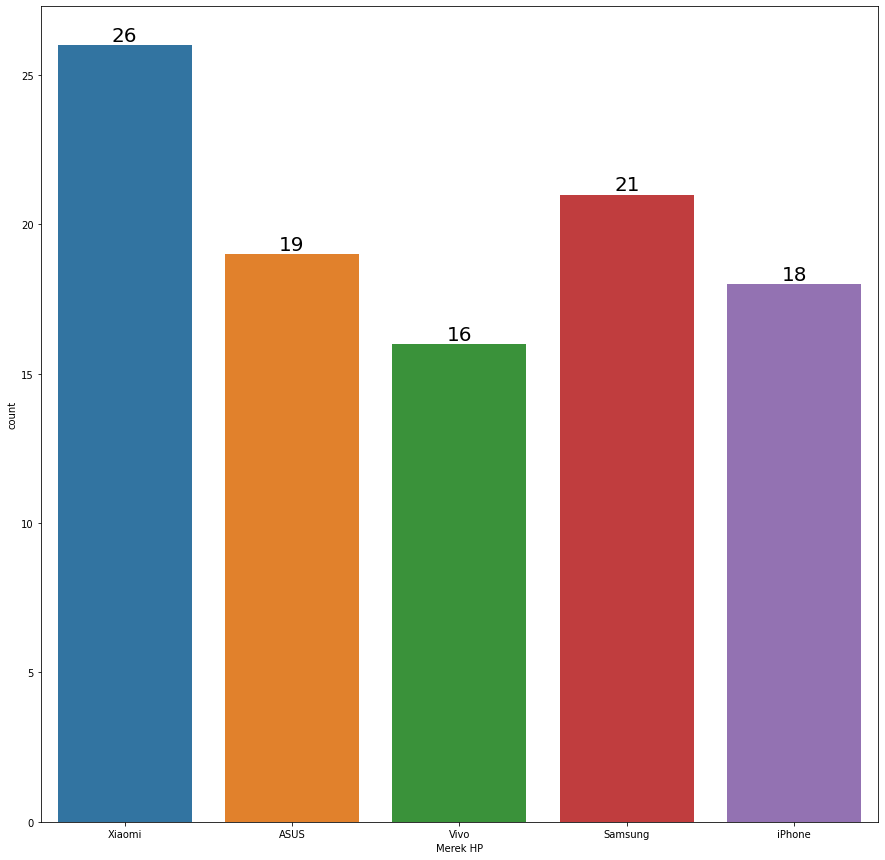

In [36]:
plt.figure(figsize=(15,15))
ax = sns.countplot(data=data, x='Merek HP', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=20)
plt.show()

Berdasarkan visualisasi di atas diketahui bahwa, Merek HP `Xiaomi` adalah merk HP terbanyak di dataset yang telah dibuat dengan jumlah `26` data dan merek HP terendah adalah merek HP `VIVO` berjumlah `16` data.

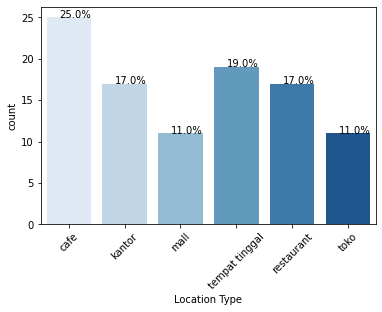

In [37]:
ax = sns.countplot(x="Location Type", data=data, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Berdasarkan visualisasi data di atas diketahui bahwa jenis tempat yang paling banyak digunakan user untuk melakukan login adalah di `cafe` yang mencapai 25% dari keseluruhan data yang ada dan posisi terendah diisi oleh data `mall` dan `toko` yang sama sama memiliki persentase 11%.

<AxesSubplot:ylabel='Umur'>

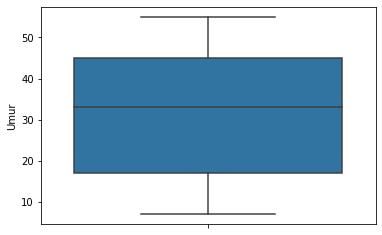

In [38]:
sns.boxplot(data=data,  y='Umur')

Berdasarkan visualisasi di atas diketahui bahwa umur user yang melakukan login itu memiliki rentang `7` tahun sampai `55` tahun

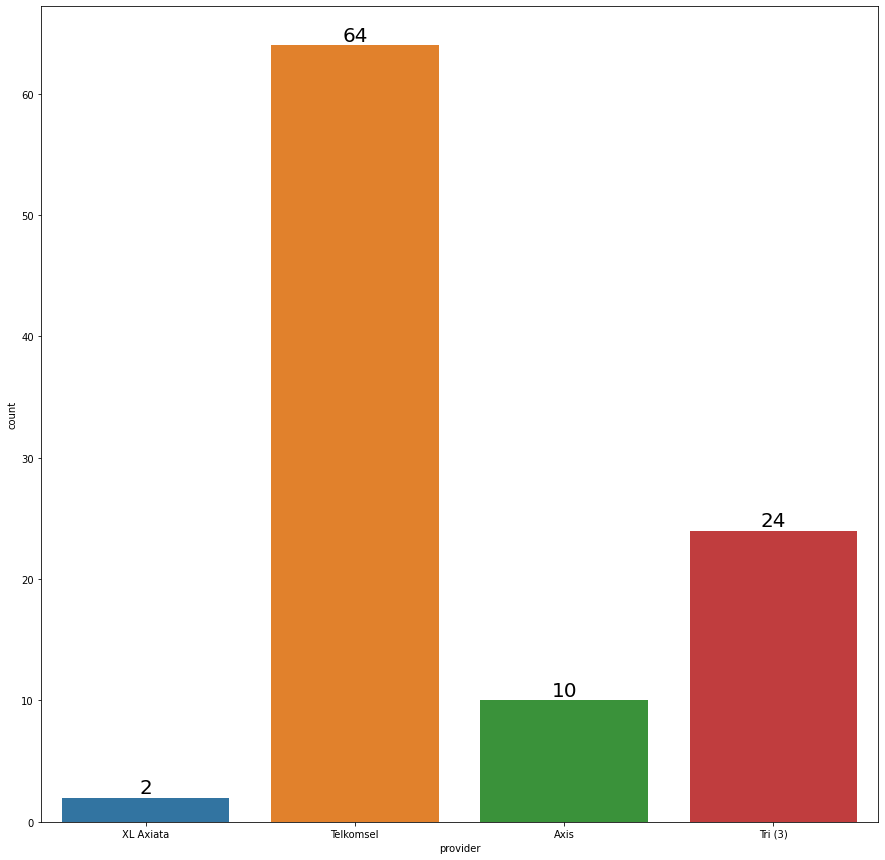

In [40]:
plt.figure(figsize=(15,15))
ax = sns.countplot(data=data, x='provider', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=20)
plt.show()

Berdasarkan visualisasi di atas, diketahui bahwa `provider`  dengan brand `Telkomsel`yang paling banyak digunakn user yang melakukan login dalam dataset yang telah dibuat adalah `provider` dengan brand `Telkomsel` sebanyak `64` data dan paling sedikit adalah `XL Axiata` yang terdiri dari hanya `2` data saja.

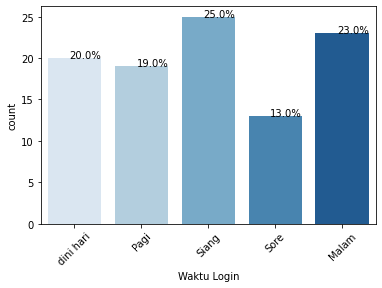

In [41]:
ax = sns.countplot(x="Waktu Login", data=data, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Berdasarkan Visualisasi diatas diketahui bahwa para user di dalam dataset tersebut paling banyak melakukan login di siang hari sebanyak 25% dan paling sedikit hanya 13% di sore hari

## 5.Kesimpulan 

> Pada penelitian ini peneliti telah berhasil membuat dataset sesuai `requirement` poin nomor 2. Dataset dapat dibuat dengan menggunakan fungsi random hampir di setiap kolom kecuali kolom `nama` dan `email`.
> Berdasarkan dataset yang ada dapat dibuat variabel baru seperti variabel kolom `umur` yang berisi informasi usia user, variabel kolom `Waktu Login` untuk mengetahui kategori waktu user melakukan login berdasarkan `jam login`, dan variabel kolom `provider` yang berisi merek provider berdasarkan nomor hp user.
> Pengukutan Confidence interval pada kolom `umur` menunjukkan rentang nilai antara 28.6 tahun hingga 34.5 tahun dengan tingkat kepercayaan sebesar 95% yang berarti nilai rata-rata populasi sesungguhnya akan berada dalam rentang tersebut